Model Accuracy: 0.9166666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       1.00      0.75      0.86        20
           2       0.87      1.00      0.93        20

    accuracy                           0.92        60
   macro avg       0.93      0.92      0.91        60
weighted avg       0.93      0.92      0.91        60



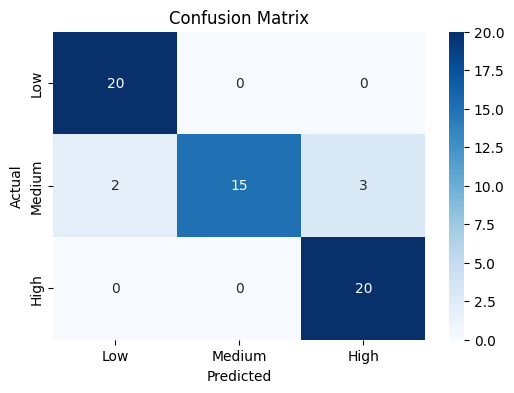

Model and scaler saved successfully.


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load the early cancer detection dataset
df = pd.read_csv('Final.csv')

# Separate features and target
X = df.drop("Cancer_Risk_Level", axis=1)
y = df["Cancer_Risk_Level"]

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Train a RandomForestClassifier model
model = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save the model and the scaler
joblib.dump(model, 'cancer_risk_prediction_model_final.pkl')
joblib.dump(scaler, 'scaler_final.pkl')

print("Model and scaler saved successfully.")